In [1]:
import os
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
from collections import defaultdict
import pickle
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

### General Functions 

In [2]:
# Unpickle Function for the CIFAR-10 dataset
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#save the model
def save_model(model):
    filename = 'SVM_model.sav'
    pickle.dump(model, open(filename, 'wb'))
    
def get_model():
    if os.path.isfile('SVM_model.sav'):
        svc=None
        flag_was_model_saved=False
        with open('SVM_model.sav', 'rb') as f:
            svc = pickle.load(f)
            flag_was_model_saved=True
        return [svc,flag_was_model_saved]
    
def combineData(data,limit=None):
    combined_data = defaultdict(list)
    for d in data:
        for key, value_list in d.items():
            if limit is not None:
                value_list = value_list[:limit]
            combined_data[key].extend(value_list)
    return combined_data

### Variables and Files

In [3]:
# Load Data
dir='cifar-10-batches-py/'

In [4]:
# Get the files
files=os.listdir(dir)
files=[dir+file for file in files]
files.sort()

In [5]:
# Get the test file
test_file=files[len(files)-1]

# index file and test File are not needed
files=files[:len(files)-2]

In [6]:
# Get the data
data=[unpickle(file) for file in files]
test_file=unpickle(test_file)

data_names=data[0]
data=data[1:]

## Cifar 10

### SVC Model

In [8]:

#get the model from file and flag to fit the model
svc,flag_was_model_saved=get_model()

if(not flag_was_model_saved):
    parameters={'kernel':('linear', 'rbf'), 'C':[1, 10]}
    svc=SVC()
    clf=GridSearchCV(svc,parameters)
    

Model ready: GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})


##### Splitting Data

In [7]:
combined_data=combineData(data)

In [8]:
# Get the data
X_test , y_test = np.array(test_file[b'data']),np.array(test_file[b'labels'])
X_train , y_train = np.array(combined_data[b'data']),np.array(combined_data[b'labels'])

#### save if not and fit the model

In [10]:
# Fit and Predict
if(not flag_was_model_saved):
    svc=clf.fit(X_train, y_train)
    save_model(svc)
y_pred=svc.predict(X_test)

#### Prediction scores

In [11]:
# Get the classification report
print(classification_report(y_test, y_pred))

# Get the accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred))

# Get the confusion matrix
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

# Get the F1 score
print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64      1000
           1       0.65      0.67      0.66      1000
           2       0.45      0.47      0.46      1000
           3       0.38      0.41      0.39      1000
           4       0.50      0.48      0.49      1000
           5       0.50      0.47      0.48      1000
           6       0.62      0.60      0.61      1000
           7       0.66      0.59      0.62      1000
           8       0.71      0.69      0.70      1000
           9       0.62      0.63      0.63      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000

Accuracy:  0.5687
Confusion Matrix: 
[[667  32  53  27  20  20  18  19  97  47]
 [ 37 670  18  31  13  17   7  23  46 138]
 [ 70  21 474  96 110  60  80  54  16  19]
 [ 25  34  96 408  68 169  87  49  21  43]
 [ 50  13 155  63 484  47  88  6

### First 1000 values of each batch

In [13]:
# Paramater tuning
parameters={'kernel':('linear', 'rbf'), 'C':[1, 10]}


In [14]:
# Initialize the classifier
svc=SVC()
clf=GridSearchCV(svc,parameters)

In [8]:
# Get the data and split them
combined_data=combineData(data,limit=1000)
X_test , y_test = np.array(test_file[b'data']),np.array(test_file[b'labels'])
X_train , y_train = np.array(combined_data[b'data']),np.array(combined_data[b'labels'])

In [16]:
# fit the model
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [21]:
clf.cv_results_

{'mean_fit_time': array([36.93399696, 33.08270164, 37.47338996, 39.72121539]),
 'std_fit_time': array([1.90118109, 2.08065237, 0.88874958, 2.23688123]),
 'mean_score_time': array([ 5.81222   , 10.79990916,  6.14381971,  9.89539266]),
 'std_score_time': array([0.32724059, 1.22245531, 0.2971546 , 0.42606543]),
 'param_C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}],
 'split0_test_score': array([0.335, 0.412, 0.335, 0.434]),
 'split1_test_score': array([0.304, 0.442, 0.304, 0.447]),
 'split2_test_score': array([0.328, 0.426, 0.328, 0.43 ]),
 'split3_test_score': array([0.291, 0.422, 0.291, 0.446]),


### Using PCA 

In [26]:
# pca
# 90% variance
pca=PCA(n_components=.90)
# model filt
pca.fit(X_train)


PCA(n_components=0.5)

In [14]:
# transform the data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [15]:
# fit the model
svc,_=get_model()
svc.fit(X_train_pca, y_train)

SVC(C=10)

In [16]:
svc.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [25]:
svc.score(X_test_pca,y_test) 
# 90% variance -> 0.4391
# 50% variance -> 0.2809

0.4391

## SVHN

### Declarations

In [3]:
# To get the matlab files into python
import h5py

In [4]:
dir_train = 'SVHN/train/'
dir_test = 'SVHN/test/'

### Functions to extract data from .mat files

In [5]:
# Extract Data from .mat file
# Έτοιμα
def get_names(h5_file):
    """ Get the names from the 'name' dataset """
    names = h5_file['digitStruct']['name']
    name_list = []
    for i in range(names.shape[0]):
        name_ref = names[i][0]
        name = ''.join(chr(c[0]) for c in h5_file[name_ref])
        name_list.append(name)
    return name_list

def get_bbox(h5_file, index):
    """ Get the bounding box data for a given index """
    item = h5_file['digitStruct']['bbox'][index].item()
    bbox = {}
    keys = ['height', 'left', 'top', 'width', 'label']

    for key in keys:
        attribute = h5_file[item][key]
        if attribute.shape[0] == 1:
            bbox[key] = [attribute[0][0]]
        else:
            bbox[key] = [h5_file[attribute[value].item()][()][0][0] for value in range(attribute.shape[0])]
    
    return bbox

### Get information about the images

In [6]:
# Έτοιμα
# Open the HDF5 file
def getImages(dir):
    images=[]
    with h5py.File(dir+'digitStruct.mat', 'r') as h5_file:
        names = get_names(h5_file)

        for i, name in enumerate(names):
            bbox = get_bbox(h5_file, i)
            images.append([name,bbox])
            # print(f"Image: {name}, BBox: {bbox}")
    return images

In [7]:
images_train=getImages(dir_train)
images_test=getImages(dir_test)

### Image processing

In [8]:
from PIL import Image
# Έτοιμα
def crop_digits(image_path, bbox_info):
    # Crop the digits from the image based on the bounding box information
    image = Image.open(image_path)
    digit_images = []

    for i in range(len(bbox_info['label'])):
        left = int(bbox_info['left'][i])
        top = int(bbox_info['top'][i])
        right = left + int(bbox_info['width'][i])
        bottom = top + int(bbox_info['height'][i])

        digit_image = image.crop((left, top, right, bottom))
        digit_images.append(digit_image)

    return digit_images
# Έτοιμα
def getDigitImages(dir,images):
    digit_images=[]
    for image in images:
        digit_images.append(crop_digits(dir+image[0], image[1]))
    return digit_images

In [9]:
digit_images_train=getDigitImages(dir_train,images_train)
digit_images_test=getDigitImages(dir_test,images_test)

### Data Preparation

In [10]:
# Έτοιμα
def preprocess_for_svm(digit_images, size=(32, 32)):
    processed_images = []
    for img in digit_images:
                
        img = img[0].resize(size).convert('L')  # Convert to grayscale and resize
        img_data = np.array(img, dtype='float32').flatten()
        img_data /= 255.0  # Normalize pixel values
        processed_images.append(img_data)

    return np.array(processed_images)

# Preprocess images
X_train = preprocess_for_svm(digit_images_train)
X_test = preprocess_for_svm(digit_images_test)


### SVM classification

#### Because there was more than one labels for each image, i choose the first one in all cases


In [11]:
# Get the labels for each image
y_test=[]
for image in images_test:
    y_test.append(image[1]['label'][0])
    
y_train=[]
for image in images_train:
    y_train.append(image[1]['label'][0])

In [12]:
# Train the SVM
svc = SVC(C=10,kernel='rbf')  # You can experiment with different kernels
svc.fit(X_train, y_train)

SVC(C=10)

In [13]:
# Evaluate the SVM
accuracy = svc.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7869605142332415


### Using multi-label targets

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier

In [15]:
y_test=[]
for image in images_test:
    y_test.append(image[1]['label'])
    
y_train=[]
for image in images_train:
    y_train.append(image[1]['label'])

In [16]:
mlb = MultiLabelBinarizer()
y_train_bin = mlb.fit_transform(y_train)
y_test_bin = mlb.transform(y_test)

In [17]:
svc = OneVsRestClassifier(SVC(kernel='rbf',C=10))

# Train the SVM
svc.fit(X_train, y_train_bin)

# Evaluate the SVM
accuracy = svc.score(X_test, y_test_bin)
print(f"Accuracy: {accuracy}")

Accuracy: 0.13575145393327212


## After class 22/11/23

## CIFAR -10

### GridSearchCV

In [7]:
combined_data=combineData(data,limit=1000)

In [8]:
X_test , y_test = np.array(test_file[b'data']),np.array(test_file[b'labels'])
X_train , y_train = np.array(combined_data[b'data']),np.array(combined_data[b'labels'])

In [9]:
parameters={"gamma":[0.1,0.01,0.001],'kernel':('linear', 'rbf','poly'), 'C':[1,10,100,1000]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ('linear', 'rbf', 'poly')})

In [11]:
clf.best_estimator_

SVC(C=1, gamma=0.1, kernel='poly')

### Data

In [3]:
combined_data=combineData(data)
X_test , y_test = np.array(test_file[b'data']),np.array(test_file[b'labels'])
X_train , y_train = np.array(combined_data[b'data']),np.array(combined_data[b'labels'])

NameError: name 'combineData' is not defined

### SVC model 

In [12]:
svc=SVC(C=1, gamma=0.1, kernel='poly')

for index,x in enumerate(X_train):
    if(index%1000==0 and index!=0):
        svc.fit(X_train[index-1000:index],y_train[index-1000:index])
        print('Score for each 1000:',svc.score(X_test[index-1000:index],y_test[index-1000:index]),'Using index:',int(index/1000))
        print('Score for the dataset',svc.score(X_test,y_test))
        if(index/10000==1): #Cause the trains is 50000 and test is 10000
            break
        

Score for each 1000: 0.322 Using index: 1
Score for the dataset 0.3203
Score for each 1000: 0.311 Using index: 2
Score for the dataset 0.3183
Score for each 1000: 0.343 Using index: 3
Score for the dataset 0.3104
Score for each 1000: 0.33 Using index: 4
Score for the dataset 0.3159
Score for each 1000: 0.318 Using index: 5
Score for the dataset 0.3117
Score for each 1000: 0.308 Using index: 6
Score for the dataset 0.3095
Score for each 1000: 0.341 Using index: 7
Score for the dataset 0.3382
Score for each 1000: 0.315 Using index: 8
Score for the dataset 0.3186
Score for each 1000: 0.324 Using index: 9
Score for the dataset 0.3273
Score for each 1000: 0.311 Using index: 10
Score for the dataset 0.313


In [8]:
svc=SVC(C=1, gamma=0.1, kernel='poly')

for index,x in enumerate(X_train):
    if (index%10000==0 and index!=0) or index==len(X_train)-1:
        svc.fit(X_train[index-10000:index],y_train[index-10000:index])
        print('Score for the test set',svc.score(X_test,y_test),'index:',int(index/10000))


Score for the test set 0.4166 index: 1
Score for the test set 0.4263 index: 2
Score for the test set 0.4146 index: 3
Score for the test set 0.3987 index: 4
Score for the test set 0.4158 index: 4


In [9]:
svc=SVC(C=1, gamma=0.1, kernel='rbf')
for index,x in enumerate(X_train):
    if (index%10000==0 and index!=0) or index==len(X_train)-1:
        svc.fit(X_train[index-10000:index],y_train[index-10000:index])
        print('Score for the test set',svc.score(X_test,y_test),'index:',int(index/10000))

Score for the test set 0.1 index: 1
Score for the test set 0.1 index: 2
Score for the test set 0.1 index: 3
Score for the test set 0.1 index: 4
Score for the test set 0.1 index: 4


In [10]:
svc=SVC(C=1, gamma=0.1, kernel='linear')
index_print=10000
for index,x in enumerate(X_train):
    if (index%index_print==0 and index!=0) or index==len(X_train)-1:
        svc.fit(X_train[index-index_print:index],y_train[index-index_print:index])
        print('Score for the test set',svc.score(X_test,y_test),'index:',int((index+1)/index_print))

Score for the test set 0.3031 index: 1
Score for the test set 0.301 index: 2
Score for the test set 0.3002 index: 3
Score for the test set 0.293 index: 4
Score for the test set 0.308 index: 5


### PCA

In [12]:
limit=1000
# Using a smaller dataset for visualization
X_train_small = X_train[:limit]
y_train_small = y_train[:limit]
X_test_small = X_test[:limit]
y_test_small = y_test[:limit]

Shape of XX: (30, 30)
Shape of YY: (30, 30)
Number of points in xy: 900
(30, 30)
900


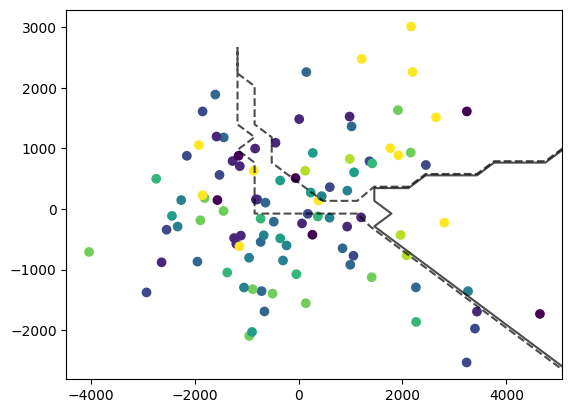

In [8]:
# ETOIMO

#Used it to plot different kernels with different C and gamma values to see the results

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Make sure X_train, X_test, y_train, y_test are defined and are appropriate for binary classification

# PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_small)
X_test_pca = pca.transform(X_test_small)

# SVM Classifier
svc = SVC(C=10000, gamma=0.00001, kernel='linear')
svc.fit(X_train_pca, y_train_small)

# Decision boundary plotting
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_small)

# Creating a mesh to plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Use more points for a finer grid
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

# Generating the mesh grid
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Printing shapes for debugging
print("Shape of XX:", XX.shape)  # Should be (30, 30)
print("Shape of YY:", YY.shape)  # Should be (30, 30)
print("Number of points in xy:", len(xy))  # Should be 900 (30x30)
# Predicting on the mesh points
print(XX.shape)
print(len(xy))

max=[]
decision=svc.decision_function(xy)
for i in decision:
    max.append(np.argmax(i))
Z = np.array(max).reshape(XX.shape)

# Plotting the decision boundaries and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7, linestyles=['--', '-', '--'])

# Highlighting the support vectors
ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')

plt.show()


From the results and plots, it's evident that the RBF kernel scores 0.1 due to its specific characteristics. Additionally, when using an RBF kernel with a high C value and an extremely low gamma, such as 0.00000001, the SVM model tends to overfit.

## Social Network Ads

https://www.kaggle.com/datasets/jahnveenarang/cvdcvd-vd

In [2]:
df=pd.read_csv('Social_Network_Ads/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
df.drop('User ID',axis=1,inplace=True)

In [5]:
def oneHotEncode(df, col):
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
    return df

df=oneHotEncode(df,'Gender')

In [14]:
target=df[['Purchased','Gender']]
feature=df.drop(target,axis=1)

In [15]:
feature

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [16]:
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size=0.4,random_state=101)

In [20]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

C= [0.001, 0.01, 0.1, 1, 10, 100,1000]
gamma=[ 0.0001,0.001,0.01, 0.1, 1, 10, 100]
models=[]
for c in C:
    for g in gamma:
        svc = SVC(C=c, gamma=g, kernel='linear',cache_size=6024)
        svc.fit(X_train_pca, y_train)
        models.append([svc.score(X_test_pca,y_test),c,g])
        
models.sort(key=lambda x: x[0],reverse=True)
models

# # Decision boundary plotting
# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
# # Creating a mesh to plot the decision boundary
# ax = plt.gca()
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()
# # Use more points for a finer grid
# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)
# # Generating the mesh grid
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Z = np.array(svc.decision_function(xy)).reshape(XX.shape)
# # Plotting the decision boundaries and margins
# ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7, linestyles=['--', '-', '--'])
# # Highlighting the support vectors
# ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
# plt.show()

[[0.8333333333333334, 0.001, 0.0001],
 [0.8333333333333334, 0.001, 0.001],
 [0.8333333333333334, 0.001, 0.01],
 [0.8333333333333334, 0.001, 0.1],
 [0.8333333333333334, 0.001, 1],
 [0.8333333333333334, 0.001, 10],
 [0.8333333333333334, 0.001, 100],
 [0.825, 0.01, 0.0001],
 [0.825, 0.01, 0.001],
 [0.825, 0.01, 0.01],
 [0.825, 0.01, 0.1],
 [0.825, 0.01, 1],
 [0.825, 0.01, 10],
 [0.825, 0.01, 100],
 [0.8166666666666667, 0.1, 0.0001],
 [0.8166666666666667, 0.1, 0.001],
 [0.8166666666666667, 0.1, 0.01],
 [0.8166666666666667, 0.1, 0.1],
 [0.8166666666666667, 0.1, 1],
 [0.8166666666666667, 0.1, 10],
 [0.8166666666666667, 0.1, 100],
 [0.8166666666666667, 1, 0.0001],
 [0.8166666666666667, 1, 0.001],
 [0.8166666666666667, 1, 0.01],
 [0.8166666666666667, 1, 0.1],
 [0.8166666666666667, 1, 1],
 [0.8166666666666667, 1, 10],
 [0.8166666666666667, 1, 100],
 [0.8166666666666667, 10, 0.0001],
 [0.8166666666666667, 10, 0.001],
 [0.8166666666666667, 10, 0.01],
 [0.8166666666666667, 10, 0.1],
 [0.8166666666

In [21]:

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

C= [0.001, 0.01, 0.1, 1, 10, 100,1000]
gamma=[ 0.0001,0.001,0.01, 0.1, 1, 10, 100]
models=[]
for c in C:
    for g in gamma:
        svc = SVC(C=c, gamma=g, kernel='rbf',cache_size=6024)
        svc.fit(X_train_pca, y_train)
        models.append([svc.score(X_test_pca,np.array(y_test).reshape(-1,1)),c,g])
        
models.sort(key=lambda x: x[0],reverse=True)
models

ValueError: y should be a 1d array, got an array of shape (240, 2) instead.

Using that data with rbf kernel to find 49 results comes into 1.4s but with max accuracy 0.8 and that using C=1000 that means it may be overfit the model cause its very strict value
In the other hand the linear kernel the results comes in 71 minutes that about 1.5m for each model to evaluate but the minimum was 0.81 with a max 0.83 using a 0.001 C such as low to help us do generic the model

Some examples i did to see how the C and gamma parameter works on linear model

score:0.77 

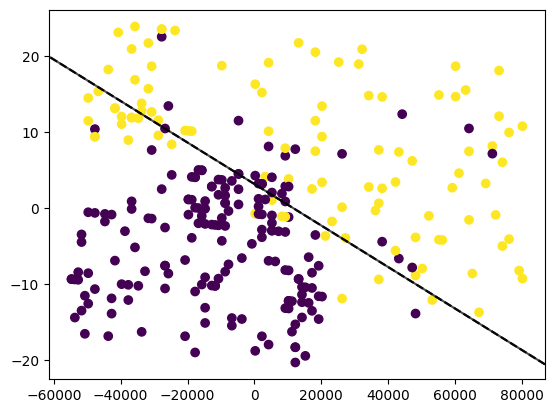 

score:0.825

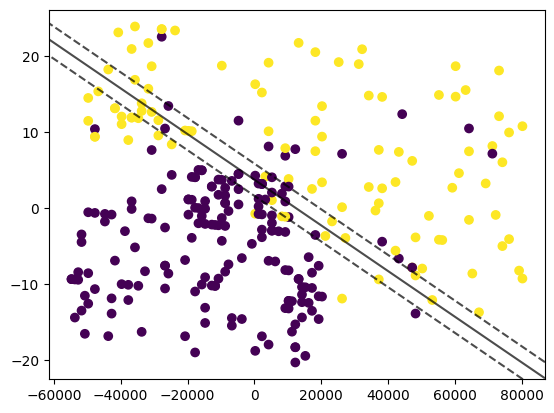 

Using rbf the result come quick, the linear takes some time about 5 minutes and using poly i waited about 300minutes and stopped the process